
### Objective: Early transcriptional changes associated with APC loss point towards altered rate of tissue patterning and skewed cellular differentiation. 

### Figure 1

In [1]:
library(pheatmap)
library(reshape2)
library(RColorBrewer)
library(EnvStats)
library(ggpubr)
library(Seurat)


Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm


The following object is masked from ‘package:base’:

    print.default


Loading required package: ggplot2

Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
“non-uniform 'Rounding' sampler used”
Warning message:
“package ‘Seurat’ was built under R version 4.0.5”
Attaching SeuratObject



In [7]:
setwd("~/apc_mut_project/")
at = read.csv("~/apc_mut_project/GSE83333_series_matrix_apc_ko_day3_mice.csv", header= T, check.names= F,  stringsAsFactors =F, row.names = 1)

In [8]:
gpl2 = read.csv("GPL6885-11608 (1).txt", header = T,  stringsAsFactors = F, comment.char = "#", sep = "\t", check.names = F, row.names = 1)

In [9]:
names = toupper(gpl2[rownames(at), 11])
at = as.matrix(at)
rownames(at) = names
head(names)

[1] "CRADD"         "DSCR1L1"       "4933428A15RIK" "TCERG1L"      
[5] "A430031N04"    "STRAP"

In [10]:
ag = aggregate(at, list(names), median)
names = ag[,1]
ag = ag[, -1]
rownames(ag) = names

In [12]:
genes = read.table("APC_day_3", header = F, sep = "\t", stringsAsFactors = F)
genes = genes[,1]
genes = c(genes, "TEBP", "AXIN2", "FZD6")
int = intersect(genes ,rownames(ag))
genes = unique(genes)

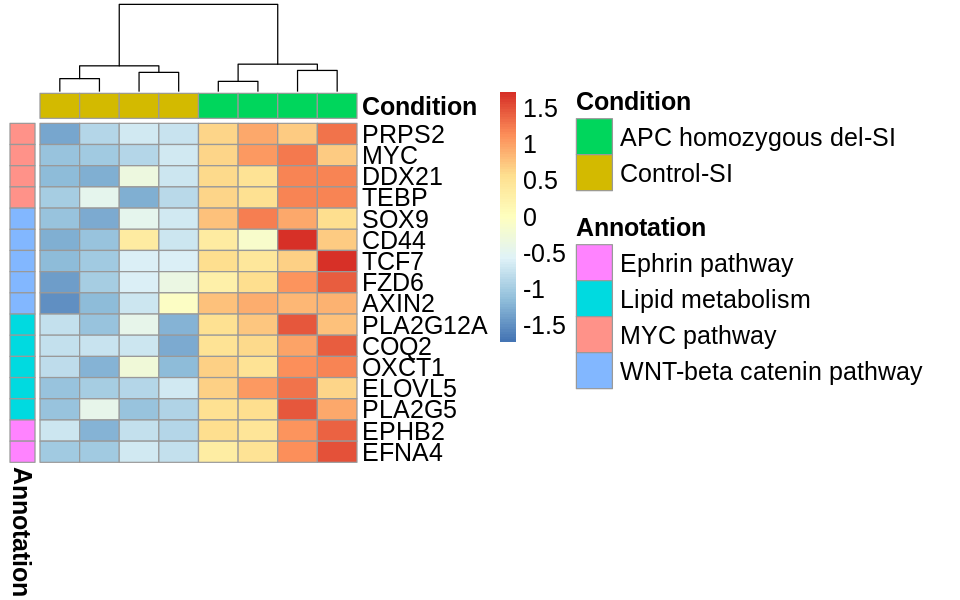

In [13]:
options(repr.plot.width=8, repr.plot.height=5)


ct = c("PRPS2", "MYC", "DDX21", "TEBP", "SOX9","CD44", "TCF7","FZD6", "AXIN2", "PLA2G12A", "COQ2", "OXCT1", "ELOVL5", "PLA2G5", "EPHB2", "EFNA4" )
names = c(rep("MYC pathway",4), rep("WNT-beta catenin pathway", 5), rep("Lipid metabolism", 5), rep("Ephrin pathway", 2))



dat = data.frame(Annotation = names, row.names = ct)

si = data.frame(Condition = c(rep("Control-SI", 4), rep("APC homozygous del-SI", 4)), row.names= colnames(ag))
pheatmap(log2(ag[ct, ]+1), scale = "row", annotation_row = dat, cluster_rows = F, annotation_col = si, show_colnames = F, fontsize = 15)

In [14]:

#### Bulk RNA seq of matched FAP and normal mucosa (adenomas)

#### bulk RNA seq

In [15]:
library(DESeq2)
library(edgeR)
si = read.csv("~/Downloads/GSE153385_patient_info.csv",  stringsAsFactors = F,  header= T, sep = "\t")
at = read.csv("~/Downloads/GSE153385_LS.FAP.patient.raw.read.counts.txt", header= T, stringsAsFactors = F, row.names = 1, sep = "\t")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The follow

In [16]:
si = si[, -1]
si = si[, grep("FAP", colnames(si))]
si = t(si)
si = as.data.frame(si)

In [17]:
names =gsub("_FAP.+$","", rownames(si))
patients = gsub("^.+_FAP","", rownames(si))
st = si[, c(1,6)]
st$patients = patients
rownames(st) = names

In [18]:
int = intersect(rownames(st), colnames(at))

In [19]:
reads = at[, int]
st = st[int, ]
si2 = si
si = st
idx = rownames(st)[which(st[, 2] == "batch: FAP3")]
si = st[idx, ]
reads2 = reads[, idx]

In [20]:
library ( edgeR )
library(DESeq2)
eDGElist <- DGEList ( counts = reads2 , group = si[,1] )
keep <- rowSums ( cpm ( eDGElist ) >= 1) >= 5
Dfs <- DESeqDataSetFromMatrix(countData = reads2[keep, ] ,
colData = si ,
design = ~patients+V1)
dds = DESeq(Dfs)
counts = counts(dds, normalized = T)
results <- results ( dds , independentFiltering = TRUE , alpha = 0.05)
results = na.omit(results)
resl = results[results$padj < 0.05, ]

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [21]:
c = c("SP5", "PITX2", "AXIN2", "NKD1", "CHGA", "DCLK1", "SST", "NEUROD1", "GCG", "MYC", "CCND1","SOX9")

In [24]:
si[,1] = as.factor(si[,1])
levels(si[,1]) 

[1] "NORMAL" "POLYP"

In [25]:
colnames(counts)

[1] "H_G108" "H_G110" "H_G79"  "H_G84"  "H_G85"  "H_G86"  "H_G87"  "H_G93" 
 [9] "H_G102" "H_G106" "H_G94"  "H_G95"  "H_G119" "H_G121"

In [27]:
colnames(counts) == rownames(si)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [31]:
polyp = which(si[,1] == "POLYP")
normal = which(si[,1] == "NORMAL")

In [32]:
si[polyp,3] == si[normal, 3]

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [33]:
lt = cbind(melt(counts[c, polyp]), melt(counts[c, normal]))


In [38]:
head(lt)

,Var1,Var2,value,Var1,Var2,value
,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>
1,SP5,H_G108,315.468592,SP5,H_G110,51.624159
2,PITX2,H_G108,1.130712,PITX2,H_G110,5.866382
3,AXIN2,H_G108,5498.651472,AXIN2,H_G110,1048.909055
4,NKD1,H_G108,525.780986,NKD1,H_G110,125.540569
5,CHGA,H_G108,1164.633152,CHGA,H_G110,7490.196205
6,DCLK1,H_G108,13.568542,DCLK1,H_G110,112.634529


In [39]:
si[ lt[,2], 3] == si[lt[,5], 3]

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [40]:
lt = lt[, c(1, 3,6)]

In [41]:
colnames(lt)= c("Gene", "Polyp", "Normal")

In [42]:
lt[,2] = log2(lt[,2]+1)
lt[,3] = log2(lt[,3]+1)

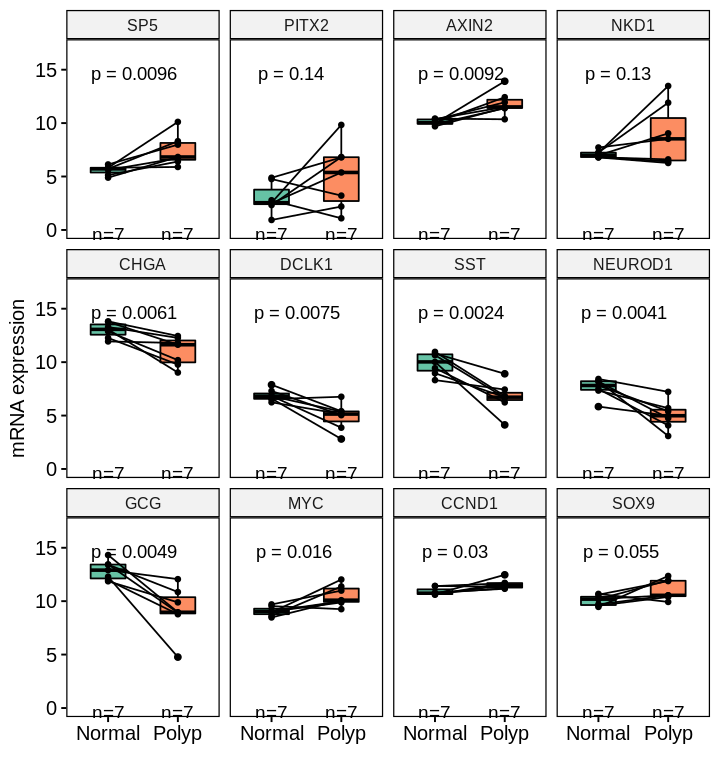

In [53]:
options(repr.plot.width=6, repr.plot.height=6.5)

p = ggpaired(lt, cond1 = "Normal", cond2 = "Polyp",
    fill = "condition", palette = "Set2", facet.by = "Gene", xlab = "", ylab = "mRNA expression", ylim = c(0, 17))
p = p + stat_compare_means( label = "p.format", method = "t.test", paired = T, label.y = 14)
p = p +stat_n_text()
p + theme(legend.position = "none")

In [54]:
### Normal colon crypts
### based on LGR5 and MKI67 stains

at = read.csv("~/GSE52813_series_matrix (1).csv", header= T, stringsAsFactors =F, row.names =1, sep = "\t")

In [55]:
att = read.csv("~/Documents/GPL11533-9491.txt", header = T , stringsAsFactors =F, row.names = 1, comment.char = "#", sep = "\t")

In [56]:
nam = gsub("NM_[0-9]+ [/]+ ", "", att[,9])
nam = gsub(" .+$", "", nam)


In [93]:
genes = c("Mxd4", "Pax4", "Neurod1", "Vim", "Agr2", "Atoh1", "Smad4", "Ctnnb1", "Prkci", "Ephb3", "Sox9")
c = c()
for(i in 1:length(genes)){
    c = append(c, grep(genes[i], att[, 9], ignore.case = T))}

In [97]:
nam[c[-c(4,8)]]
c = c[-c(4,8)]
mini = at[rownames(att)[c], ]
rownames(mini) = nam[c]

[1] "Mxd4"    "Pax4"    "Neurod1" "Vim"     "Agr2"    "Atoh1"   "Smad4"  
 [8] "Ctnnb1"  "Prkci"   "Ephb3"   "Sox9"

In [98]:
colnames(mini) =gsub("_rep.+$", "", colnames(at))


In [99]:
head(mini)

,Lgr5hi_Ki67hi,Lgr5hi_Ki67hi,Lgr5hi_Ki67low,Lgr5hi_Ki67low,Lgr5med_Ki67hi,Lgr5med_Ki67hi,Lgr5med_Ki67hi,Lgr5med_Ki67hi,Lgr5med_Ki67low,Lgr5med_Ki67low
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mxd4,7.419298,7.496831,7.407213,7.353946,7.347582,7.289574,7.302331,7.141382,7.779417,7.578164
Pax4,4.685491,4.353968,4.089150,4.344356,4.375452,4.406669,4.403531,4.327513,6.120319,5.863758
Neurod1,4.750907,4.652992,4.295860,4.200748,4.550582,4.445356,4.285071,4.658070,7.353585,6.648584
Vim,6.354066,6.011342,5.824061,5.926562,6.097059,5.970229,5.624124,6.253734,8.605036,8.373516
Agr2,11.467290,11.415820,11.113290,11.284180,11.497440,11.326730,11.463930,11.638060,12.357570,12.163060
Atoh1,7.184584,7.151378,6.708331,6.914145,6.937234,7.178901,7.209943,7.075996,9.262753,8.264345


In [100]:
df = matrix(0, ncol(mini), 2)
colnames(df) = c("LGR5 staining", "MKI67 staining")
df[grep("Lgr5hi", colnames(mini)), 1] = "High"
        df[grep("Lgr5med",colnames(mini)), 1] = "Medium"
                df[grep("Ki67hi", colnames(mini)), 2] = "High"
                        df[grep("Ki67low",colnames(mini)), 2] = "Low"

In [101]:
head(df)

LGR5 staining,MKI67 staining
High,High
High,High
High,Low
High,Low
Medium,High
Medium,High


In [102]:
rownames(df) = colnames(at)
colnames(mini) = colnames(at)
df = as.data.frame(df)

In [103]:
genes = c("Mxd4", "Pax4", "Neurod1", "Vim", "Agr2", "Atoh1", "Smad4", "Ctnnb1", "Prkci", "Ephb3", "Sox9")

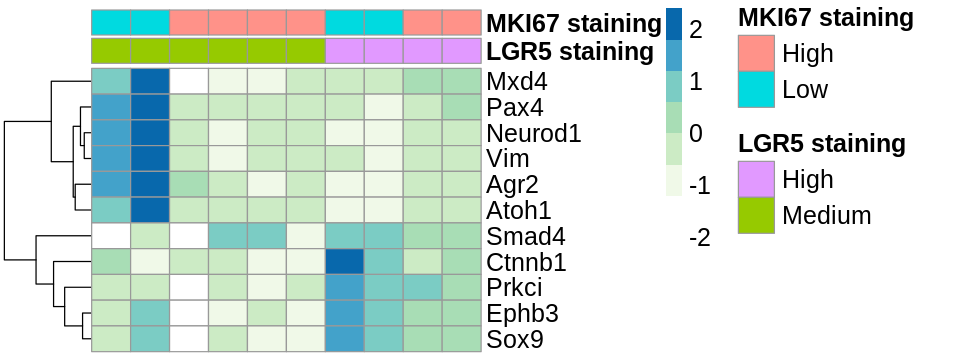

In [104]:
options(repr.plot.width=8, repr.plot.height=3)

pheatmap(log2(mini[genes, rev(colnames(mini))]+1),scale = "row", cluster_cols = F, col = c("white", "white", brewer.pal(6, "GnBu")), annotation_col = df, fontsize = 15, show_colnames = F)

In [ ]:
### APC DOX on and off - cellular differentiation

In [105]:
lt2 = read.csv("~/GSE67186_counts.csv", header= T, stringsAsFactors = F,  sep = "\t", check.names = F)

In [107]:
names = lt2[,1]
lt2 = lt2[, -1]
lt2 = as.matrix(lt2)
rownames(lt2) = names

In [109]:
idx = grep("K", colnames(lt2))
lt = lt2[, -idx]

In [112]:
ren = grep("_RD_", colnames(lt))
ad = grep("_AD_", colnames(lt))
aod = grep("_AOD_", colnames(lt))

In [116]:
colnames(lt)[ren] = "Ren"
colnames(lt)[ad] = "AD"
colnames(lt)[aod] = "AOD"
t = paste(colnames(lt), 1:ncol(lt), sep = "")
colnames(lt)= t
rownames(lt) = toupper(rownames(lt))
dat2 = data.frame(Condition  = c(rep("APC Dox On", 4), rep("APC Dox off",4), rep( "Renilla Dox on", 2)), row.names = t[c( ad, aod, ren)])

In [117]:
goblet = c("PKD1", "MUC2", "AGR2")
neuro = c("NEUROD1","VIM","DCN", "CHGA", "DCLK1","SCGN")
paneth = c("MMP7", "EPHB3", "LYZ1", "DEFA5")
enterocyte = c("RNF43", "KRT23","KCNQ1")
transit = c("CD44", "SOX9", "AXIN2", "CCND1")
stem = c("LGR5", "ASCL2")

nam = c(goblet, neuro, paneth, enterocyte, transit, stem)
length(nam)

dat = data.frame(Cell_markers = c(rep("Goblet", 3),rep("Enteroendocrine", 6), rep("Paneth", 4), rep("Brush/tuft", 3), rep("Transit", 4), rep("Stem", 2)), row.names = nam)
colors  = list(Condition = c(brewer.pal(6, "Accent")[1:3]), Markers =c(brewer.pal(6, "Dark2")))
names(colors[[2]]) = unique(dat[,1])
names(colors[[1]]) = unique(dat2[,1])

[1] 22

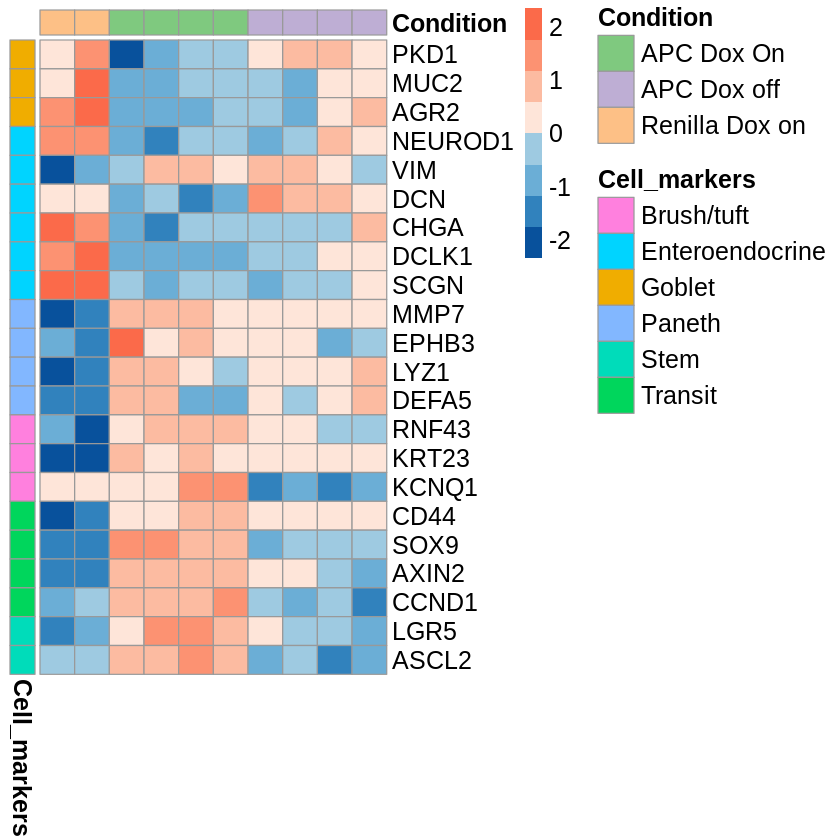

In [118]:
options(repr.plot.width=7, repr.plot.height=7)

pheatmap(log2(lt[rownames(dat), rownames(dat2)[c(10, 9, 1:8)]]+1), show_colnames = F, scale = "row", cluster_rows = F,col = rev(c(rev(brewer.pal(6, "Reds"))[-c(1,2)], brewer.pal(6, "Blues")[-c(1,2)])), fontsize = 15,  cluster_cols = F, annotation_col = dat2, annotation_row = dat, annotation_colors = colors)

In [1]:
##



### Objective: The ubiquitous loss of proliferative and dedifferentiation homeostasis during adenoma-carcinoma progression

### Figure 2

In [7]:
### scRNA-seq data analysis (FAP, normal, carcinomas)
library(Seurat)

Warning message:
“package ‘Seurat’ was built under R version 4.0.5”
Attaching SeuratObject



In [3]:
setwd("~/Documents/GSE155698")
download.file("https://ftp.ncbi.nlm.nih.gov/geo/series/GSE109nnn/GSE109308/suppl/GSE109308_Colon_FAP_TPM_new2.txt.gz", "colon.gz")

at = read.csv(gzfile("colon.gz"), sep = "\t", header= T, stringsAsFactors =F, row.names =1)

In [4]:
head(at)

,FAP3_C_R1_1,FAP3_C_R1_2,FAP3_C_R1_3,FAP3_C_R1_4,FAP3_C_R1_5,FAP3_C_R1_6,FAP3_C_R1_7,FAP3_C_R1_8,FAP3_C_R1_9,FAP3_C_R1_10,⋯,FAP4_SI_N_B1_95,FAP4_SI_N_B1_96,FAP4_LI_N1_B1_89,FAP4_LI_N1_B1_90,FAP4_LI_N1_B1_91,FAP4_LI_N1_B1_92,FAP4_LI_N1_B1_93,FAP4_LI_N1_B1_94,FAP4_LI_N1_B1_95,FAP4_LI_N1_B1_96
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,0,0.00,0,0,0,0.00,0,616.29,0.0,0.00,⋯,0,2.67,0,0,0.00,0,0.00,0,0,0.00
A1BG-AS1,0,0.00,0,0,0,0.00,0,0.00,0.0,0.00,⋯,0,0.00,0,0,0.00,0,0.00,0,0,0.00
A1CF,0,0.00,0,0,0,0.00,0,0.00,0.0,0.00,⋯,0,2.67,0,0,653.47,0,180.02,0,0,52.75
A2M,0,1452.28,0,0,0,22.54,0,0.00,29.9,36.61,⋯,0,0.00,0,0,0.00,0,0.00,0,0,0.00
A2M-AS1,0,0.00,0,0,0,0.00,0,0.00,0.0,0.00,⋯,0,0.00,0,0,0.00,0,0.00,0,0,0.00
A2ML1,0,0.00,0,0,0,0.00,0,0.00,0.0,0.00,⋯,0,0.00,0,0,0.00,0,0.00,0,0,0.00


In [5]:
fap = grep("FAP", colnames(at))

aa = at
at = at[, fap]
canc = grep("_C_", colnames(at))
aden = grep("_A_", colnames(at))
normal = grep("_N_", colnames(at))

In [8]:
pbmc = CreateSeuratObject(at)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [9]:
names = gsub("_C.+$", "_C", colnames(at))
names = gsub("_N.+$", "_N", names)
names = gsub("_A.+$", "_A", names)
names = gsub("_LM.+$", "_LM", names)
names(names) = colnames(at)

In [10]:
pbmc$orig.ident = names

In [11]:
all(names(names) == names(pbmc$orig.ident))

[1] TRUE

In [12]:
pbmc$patient = gsub("_.+$", "", pbmc$orig.ident)
pbmc$sample = gsub(".+_", "", pbmc$orig.ident)

In [13]:
pbmc <- subset(pbmc, subset = nFeature_RNA > 200)
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)
all.genes <- rownames(pbmc)
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



In [14]:
it33 = names(pbmc$orig.ident)[grep("FAP[0-6]_A", pbmc$orig.ident)]
it35 = names(pbmc$orig.ident)[grep("CRC[0-6]_C", pbmc$orig.ident)]
it56 = names(pbmc$orig.ident)[grep("FAP[0-6]_C", pbmc$orig.ident)]
it55 = c(it35, it56)

In [15]:
dat = data.frame(c(rep("FAP adenoma", length(it33)), rep("Sporadic CRC",  length(it35)),rep("FAP adenocarcinoma",  length(it56))) , row.names= c(it33, it55))
colnames(dat) = "Sample"

In [16]:
TNF= c("PPP1R15A","CD83","GADD45B","MYC","DNAJB4","TNFAIP3","CXCL1","SGK1","KLF2")
mtor = c("PPP1R15A","STIP1","ELOVL5","HSPA4","DDIT4","SERPINH1","CXCR4","CACYBP","HSPE1","GLA","HSPD1")
mapk = c("SRGN","PPP1R15A","CD74","CXCL8","CD83","GADD45B","LAPTM5","TNFAIP3","CXCR4","RGS2","RGCC","RGS1","ARHGDIB","B2M")
si = data.frame(c(rep("TNF signaling", length(TNF)), rep("MTOR signaling", length(mtor)), rep("MAP3K8 signaling", length(mapk))))

sti = aggregate(si, list(c(TNF, mtor, mapk)), min)
st = sti[,2]

si = data.frame(Pathway = sti[order(sti[,2]),2], row.names= sti[order(sti[,2]),1])

st2 = data.frame(Pathway = c(rep("Alpha-Defensins", 4), rep("Carbonate hydratases", 2)), row.names = c("REG3A", "DEFA6", "REG1A", "DEFA5", "CA12", "CA2"))
si = rbind(si, st2) 

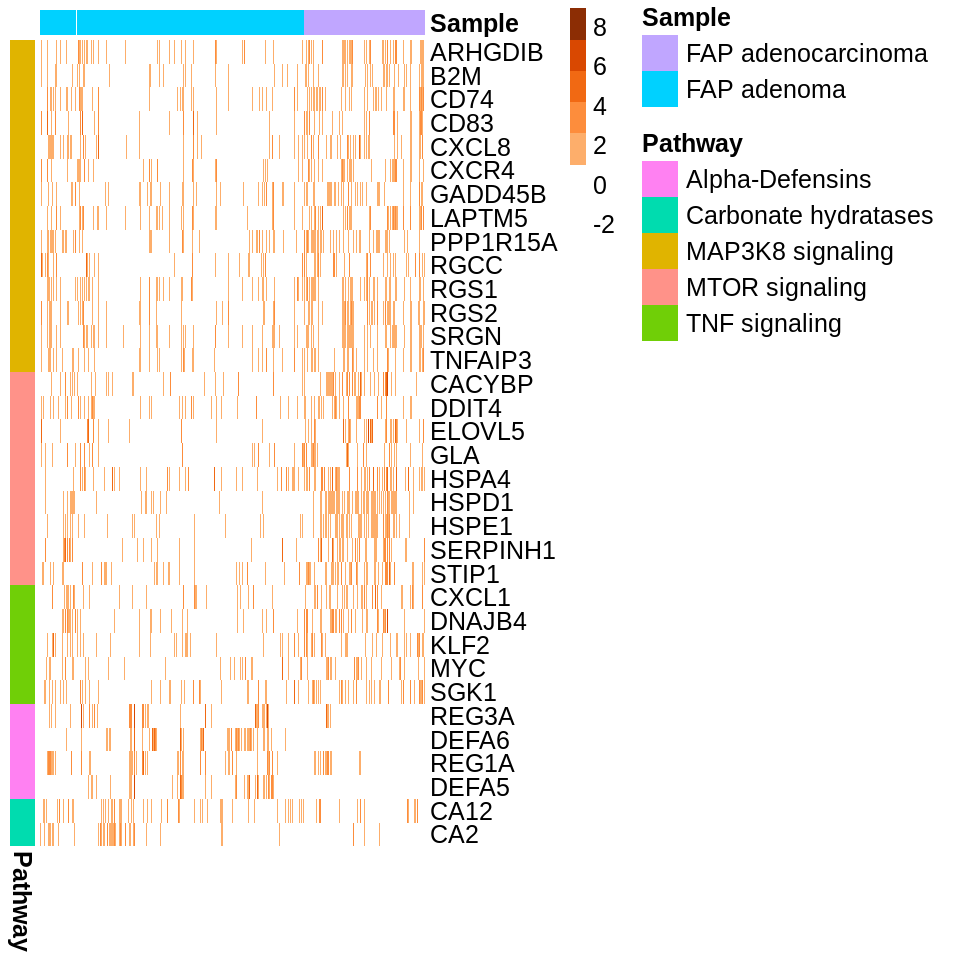

In [19]:
library(pheatmap)
library(RColorBrewer)
options(repr.plot.width=8, repr.plot.height=8)

smallsc = pbmc@assays$RNA@scale.data[, c(rownames(dat))]

pheatmap(smallsc[rownames(si), rownames(dat)], annotation_row = si, annotation_col = dat, cluster_rows = F,cluster_cols = F, show_colnames= F, fontsize = 15, col = c("white", "white", "white",  brewer.pal(7, "Oranges")[3:7]))

In [21]:
### Estimate gene-expressing cell proportions

sc = pbmc@assays$RNA@scale.data
ct2 =table(pbmc$orig.ident)
genes = rownames(sc)
mat = matrix(0, length(genes), length(unique(pbmc$orig.ident)))
colnames(mat) = unique(pbmc$orig.ident)
rownames(mat) = genes
for(i in 1:length(genes)){
  ct = which(as.numeric(sc[genes[i], ]) > summary(as.numeric(sc[genes[i], ]))[5])
  ct = table(pbmc$orig.ident[ct])
  c11 = sort(ct/ct2[names(ct)])
  mat[i, names(c11)] = as.numeric(c11)
}

In [22]:
matr = mat[, grep("FAP[0-3]_[A-C]", colnames(mat))]

In [23]:
matr = matr[, c(2,1,4,3,5,6)]

In [25]:
lyt = c("ALDH9A1", "AP1M1", "BAG4", "LGALS1", "NCKAP1", "NFKB1", "NFYC", "SMAD4", "AGR2")
te = rbind(matr[lyt, c(1,2)], matr[lyt, c(3,4)],matr[lyt, c(5,6)])
te = data.frame(gene = rownames(te), te)
colnames(te) = c("gene", "Adenoma", "Carcinoma")

In [28]:
head(matr)
head(te)

,FAP3_A,FAP3_C,FAP2_A,FAP2_C,FAP1_A,FAP1_C
A1BG,0.159722222,0.30366492,0.131343284,0.1274976213,0.130319149,0.084210526
A1BG-AS1,0.000000000,0.00000000,0.000000000,0.0009514748,0.005319149,0.002631579
A1CF,0.142361111,0.04188482,0.182089552,0.1341579448,0.143617021,0.115789474
A2M,0.222222222,0.48691099,0.179104478,0.1322549952,0.085106383,0.186842105
A2M-AS1,0.013888889,0.02617801,0.014925373,0.0104662226,0.010638298,0.010526316
A2ML1,0.003472222,0.00000000,0.002985075,0.0057088487,0.002659574,0.005263158


,gene,Adenoma,Carcinoma
,<chr>,<dbl>,<dbl>
ALDH9A1,ALDH9A1,0.2256944,0.2827225
AP1M1,AP1M1,0.1076389,0.1361257
BAG4,BAG4,0.0937500,0.1151832
LGALS1,LGALS1,0.2777778,0.3926702
NCKAP1,NCKAP1,0.3055556,0.3350785
NFKB1,NFKB1,0.2916667,0.3507853


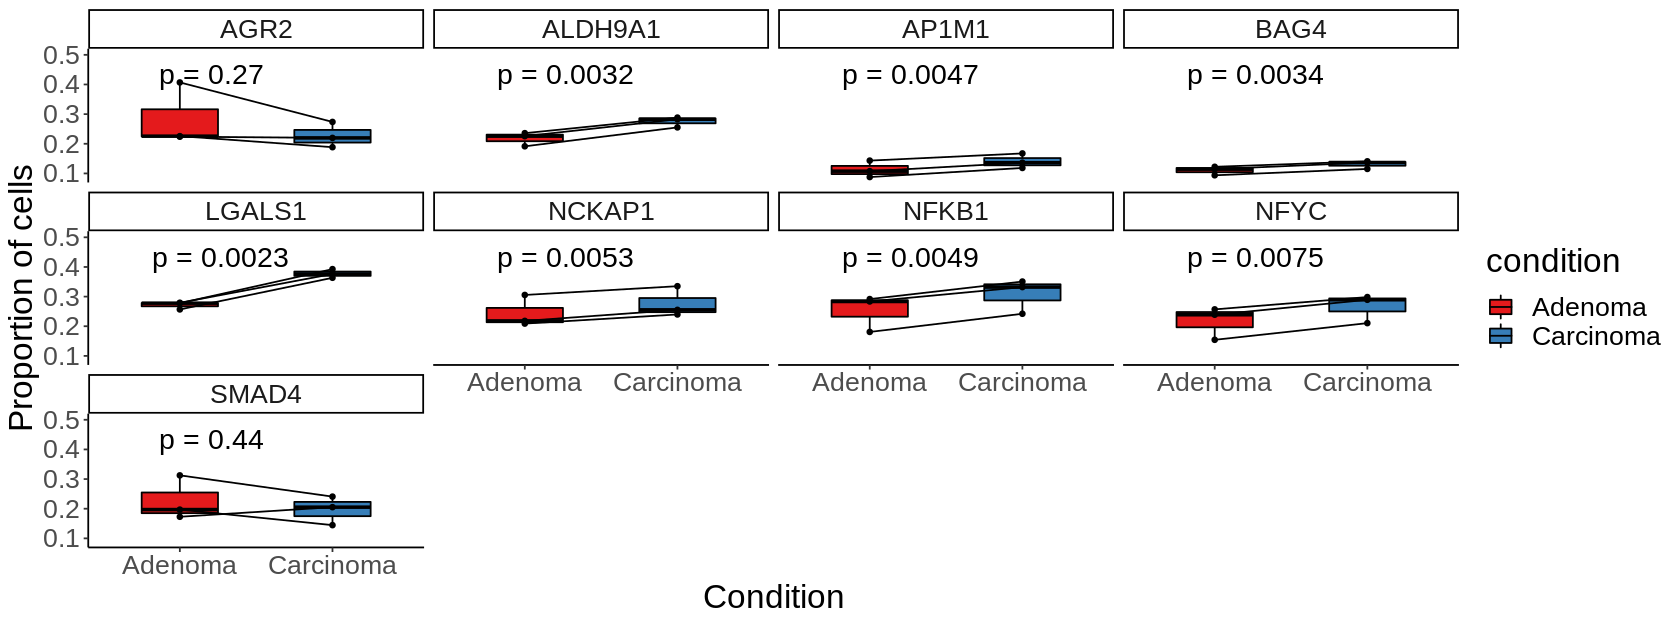

In [34]:
library(ggpubr)
options(repr.plot.width=14, repr.plot.height=5.2)

p = ggpaired(te, cond1 = "Adenoma", cond2 = "Carcinoma",
    fill = "condition", palette = "Set1", facet.by = "gene",size = 12, add = "Jitter", ylab = "Proportion of cells", ylim = c(0.09, 0.5) )
p = p + stat_compare_means( label = "p.format", method = "t.test", paired = T, size = 6, label.y = 0.4)
p = p+theme_classic()+ facet_wrap(~ gene, ncol = 4)
p = p+
theme(text = element_text(size = 20))   
p

In [35]:
### Quantify Myc expressing cells

In [88]:
lt = grep("_A", pbmc$orig.ident)
sc = pbmc@assays$RNA@scale.data[, lt]
idx = which(sc["CDH1", ] > summary(sc["CDH1", ])[5] )
idx2 = which(sc["MYC", ] > summary(sc["MYC", ])[5] )
idxF = which(sc["MYC", ] <= summary(sc["MYC", ])[2] )

idx3 = colnames(sc)[intersect(idx, idx2)]
idx44 = colnames(sc)[intersect(idx, idxF)]

idx4 = colnames(sc)[which(sc["TP53", idx] > summary(sc["TP53", idx])[5] )]
idx5 = colnames(sc)[which(sc["AIFM3", idx] > summary(sc["AIFM3", idx])[5] )]

In [89]:
intersect(idx, idx)

[1]    2    3    4    6   12   13   27   32   34   36   37   42   45   48   49
 [16]   50   55   56   63   74   77   78   82   85   88   93   98  100  102  105
 [31]  106  108  115  122  123  124  128  129  131  132  133  134  136  139  142
 [46]  144  146  148  153  156  160  162  163  167  169  171  177  178  182  186
 [61]  188  189  190  192  212  226  227  246  248  250  259  262  263  267  270
 [76]  281  291  293  294  295  299  300  303  304  306  307  309  312  313  316
 [91]  320  327  337  338  340  341  342  346  352  354  355  357  364  365  373
[106]  374  375  377  385  386  387  388  395  398  399  403  405  406  409  410
[121]  411  412  413  415  419  420  423  424  425  426  428  431  433  437  442
[136]  444  445  450  451  453  455  460  461  463  464  465  468  469  471  472
[151]  473  480  484  521  525  558  559  581  611  620  635  653  654  657  663
[166]  672  676  687  691  704  708  713  745  766  774  787  803  805  807  808
[181]  809  810  811  815  816  819  823  827  830  831  832  834  836  853  858
[196]  860  862  864  865  867  869  870  871  874  879  881  883  889  894  895
[211]  897  898  900  902  903  907  908  909  910  912  915  916  918  921  922
[226]  925  926  927  928  929  930  931  932  933  934  935  936  937  938  940
[241]  941  942  943  944  948  950  951  952  953  954  955  958  960  963  965
[256]  966  967  969  970  971  976  978  979  980  981  984  986  988  990  992
[271]  993  994  998 1001 1002 1003 1006 1007 1008 1009 1010 1011 1012 1013 1014
[286] 1015 1018 1019 1020 1026 1027 1028 1031 1032 1033 1034 1035 1037 1038 1039
[301] 1040 1043 1047 1051 1052 1053 1054 1057 1058 1063 1066 1068 1069 1070 1071
[316] 1075 1077 1080 1083 1088 1091 1092 1094 1096 1097 1099 1100 1101 1105 1106
[331] 1109 1111 1112 1118 1120 1122 1125 1126 1127 1128 1129 1130 1131 1133 1134
[346] 1136 1137 1138 1139 1140 1142 1143 1145 1149 1150 1151 1152 1154 1155 1156
[361] 1159 1160 1161 1163 1165 1166 1167 1168 1169 1170 1172 1173 1174 1175 1176
[376] 1177 1178 1179 1180 1181 1184 1185 1186 1187 1189 1190 1192 1194 1195 1196
[391] 1199 1200 1201 1202 1204 1205 1207 1208 1212 1213 1215 1216 1217 1218 1219
[406] 1220 1221 1223 1224 1226 1227 1229 1232 1233 1236 1237 1238 1241 1242 1243
[421] 1244 1246 1249 1251 1252 1253 1254 1255 1256 1257 1259 1260 1263 1265 1268
[436] 1269 1270 1274 1283 1287 1296 1306 1316 1319 1330 1331 1335 1343 1346 1347
[451] 1352 1359 1373 1375 1378 1386 1388 1404 1414 1415 1416 1422 1423 1424 1437
[466] 1440 1443 1449 1457 1464 1473 1474 1489 1495 1496 1497 1498 1501 1504 1507
[481] 1510 1517 1519 1521 1523 1525 1526 1528 1533 1536 1542 1543 1547 1549 1556
[496] 1561 1569 1594 1596 1600 1603 1606 1633 1641 1643 1647 1652 1656 1657 1658
[511] 1669 1672 1685 1693 1696 1701 1705 1708 1709 1712 1713 1714 1715 1717 1719
[526] 1730 1733 1738 1744 1750 1763 1765 1766 1768 1771 1775 1776 1788 1790 1796
[541] 1797 1801 1807 1809 1813 1814 1817 1822 1823 1834 1838 1839 1840 1841 1855
[556] 1869 1873 1880 1881 1883 1885 1890 1892 1907 1920 1923 1924 1935 1938 1946
[571] 1947 1953 1954 1955 1956 1957 1965 1969 1971 1972 1980 1990 1994 2009 2026
[586] 2032 2038 2039 2043 2044 2050 2052 2054 2059 2062 2075 2076 2089 2090 2091
[601] 2093 2095 2097 2103 2110 2116 2122 2131 2133 2135 2139 2145 2147 2151 2155
[616] 2160 2171 2173 2175 2186 2189 2195 2196 2198 2200 2202 2203 2204 2214 2218
[631] 2221 2222 2226 2230 2233 2240 2241 2245 2246 2251 2258 2259 2262 2263 2265
[646] 2268 2269 2270 2275 2276 2278 2279 2282 2291 2292 2294 2295 2296 2297 2298
[661] 2299 2305 2308 2309 2311 2312 2313 2314 2320 2322 2339 2353 2359 2360 2364
[676] 2365 2366 2382 2384 2398 2401 2411 2416 2419 2422 2431 2432 2433 2434 2437
[691] 2439 2440 2448 2455 2459 2461 2466 2468 2469 2471 2485 2486 2487 2489 2491
[706] 2492 2501 2511 2522 2540 2547 2550 2554 2573 2574 2580 2582 2583 2589 2601
[721] 2604 2606 2607 2608 2611 2612 2613 2616 2617 2623 2627 2630 2636 2638 2641
[736] 2643 2652 2656 2659 2661 26

In [90]:
features1 = c("ATP6V0E1", "NDUFA4", "NDUFC1", "UQCRH", "MRPL11", "PRDX3","NDUFAB1", "UQCRC2")
features2 = c("TP53", "AIFM1", "AIFM3", "IFITM3", "IFITM1")
features3 = c("RPL6", "RPS14","RPL37", "RPL13A", "RPS3A", "RPL10A", "MKI67")

In [91]:
pbb = subset(pbmc, cells = c(idx3, idx44))
pbb$cMYC  = c(rep("High MYC", length(idx3)), rep("Low MYC", length(idx44)))

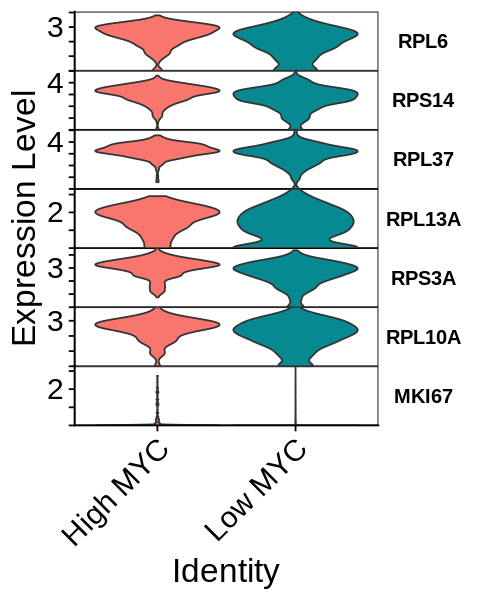

In [92]:
options(repr.plot.width=4, repr.plot.height=5)

p = VlnPlot(pbb, features = features3, pt.size = 0, stack = T, flip = T, group.by = "cMYC", split.by = "cMYC")+ FontSize(x.title = 20, y.title = 20, x.text = 18, y.text = 18)
p + NoLegend()

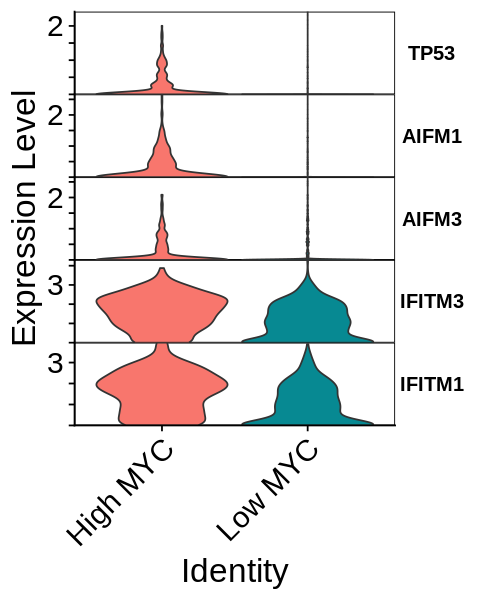

In [93]:
p = VlnPlot(pbb, features = features2, pt.size = 0, stack = T, flip = T, group.by = "cMYC", split.by = "cMYC")+ FontSize(x.title = 20, y.title = 20, x.text = 18, y.text = 18)
p + NoLegend()

In [94]:
#### SMAD4, CDX2 & KRAS organoids


In [95]:
ait = read.csv("~/GPL23038-70510.txt", header= T, stringsAsFactors =F, row.names = 1, sep = "\t", comment.char = "#")

In [96]:
lto = gsub("^.+ [(]", "", ait$mrna_assignment)

In [97]:
lto = gsub("[)].+$", "", lto)

In [98]:
df = data.frame(Gene = lto, row.names = rownames(ait))

In [99]:
alt = read.csv("~/GSE143509_series_matrix.csv",  header = T, stringsAsFactors = F, row.names = 1, sep = "\t")

In [100]:
ag = aggregate(alt, list(df[rownames(alt), 1]), mean)

In [101]:
names = ag[,1]
rownames(ag) = names
ag = ag[, -1]

In [102]:
colnames(ag) = gsub("genotype.variation..", "", colnames(ag))
colnames(ag) = gsub("[.][0-9]+$", "", colnames(ag))
ag = ag[, 1:16]

In [103]:
genes = c( "Gast", "Sst", "Chga","Scnn1b", "Agr2", "Spdef", "Prkci", "Mmp7", "Ephb3", "Lyz1", "Reg3g","Defa1", "Ldha", "Lgals1", "Cpox", "Mif", "Tfrc", "Gga2", "Krt20")
df = data.frame(Markers = c(rep("Neuroendocrine", 3), rep("Goblet", 3), rep("Paneth", 6), rep("HIF1a/glycolytic/mTOR", 7)), row.names =genes)
df2 = data.frame(Genotype = c(rep("APC WT", 4), rep("Apc fl/fl", 4), rep("Apc fl/fl+ t(KrasG12D)", 4), rep("Apc fl/fl+ t(KrasG12D)+ shSMAD4", 4)), row.names = colnames(ag) )
df2[,1] = as.factor(df2[, 1])
df2[,1]= factor(df2[,1], levels = levels(df2[,1])[c(4,1,2,3)])
df3 = df2
df3$SMAD4 = as.numeric(ag["Smad4", ])

In [105]:
library(RColorBrewer)
col = list(rev(brewer.pal(4, "Set1")))
names(col) = "Genotype"
names(col[[1]]) = unique(df2[,1])

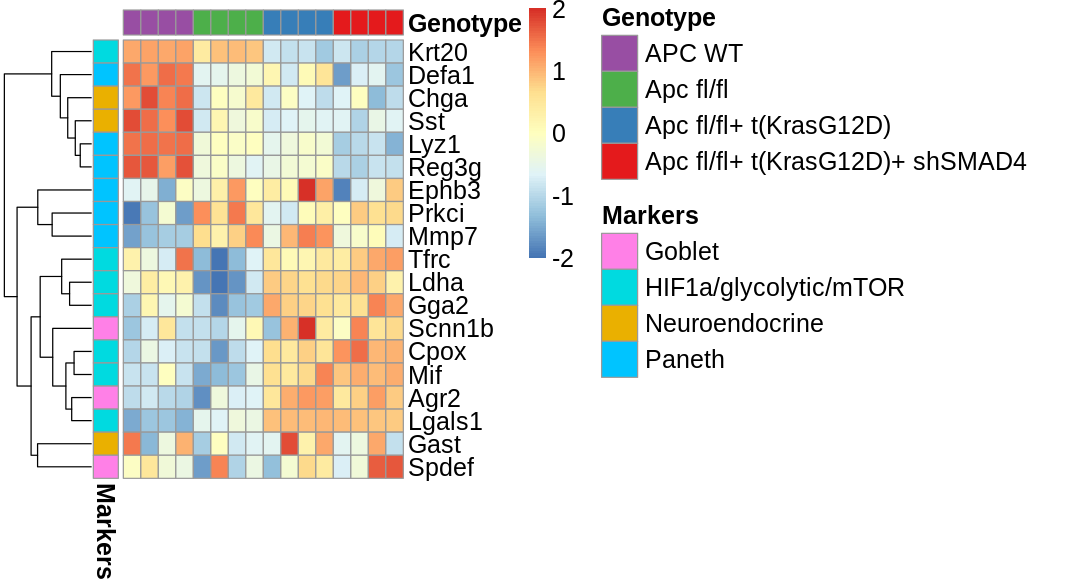

In [106]:
options(repr.plot.width=9, repr.plot.height=4.89)

pheatmap(log2(ag[genes, ]+1), scale = "row",fontsize = 15, annotation_colors = col, annotation_col = df2, annotation_row = df, show_colnames = F, cluster_cols = F)

In [ ]:
### SMAD4 KO and betacatenin GOF genotypes vs control

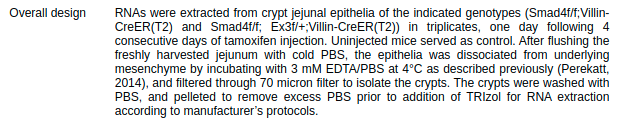

### source : https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE102171

In [107]:
at = read.csv("~/GSE102171_SmadBcat_only_genes.fpkm_table.txt", header= T, stringsAsFactors = F, sep = "\t", row.names = 1)

In [109]:
colnames(at) = gsub("_.+$", "", colnames(at))
head(at)

,Control,Control,Control,SmadBcat,SmadBcat,SmadBcat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610005C13Rik,35.41930,28.76250,74.13830,8.21961,10.3476,7.90213
0610007P14Rik,83.71270,83.16050,77.58830,84.37240,82.0756,98.76770
0610009B22Rik,40.60300,29.73670,37.11830,28.02540,32.4285,32.35130
0610009L18Rik,2.68445,2.46778,3.27389,2.08398,1.1717,1.22527
0610009O20Rik,29.46580,23.74510,24.79710,24.12600,22.5756,23.79570
0610010B08Rik,0.00000,0.00000,0.00000,0.00000,0.0000,0.00000


In [113]:
at2 = read.csv("~/GSE102171_Smad4KO_only_genes.fpkm_table.txt", header= T, stringsAsFactors = F, sep = "\t", row.names = 1)
colnames(at2) = gsub("_.+$", "", colnames(at2))

In [116]:
ct  = c("LTV1", "BOP1", "PAK1IP1", "MRTO4", "LYAR", "SENP3", "RRP9", "BYSL")
ct2 = c( "IL10", "TLR2", "MAP3K8", "TNF", "CXCL5", "TGFB1")
all = c(ct, ct2)

In [114]:
rownames(at)= toupper(rownames(at))
rownames(at2)= toupper(rownames(at2))

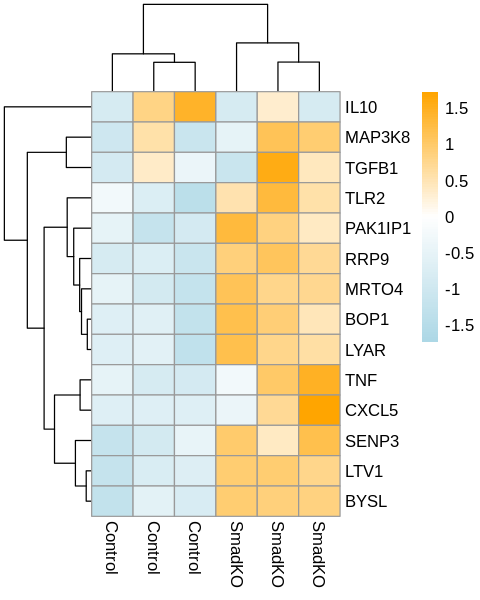

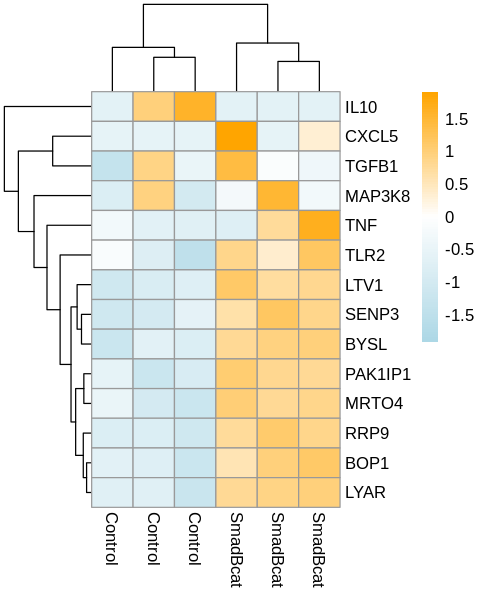

In [118]:
options(repr.plot.width=4, repr.plot.height=5)

library(pheatmap)
pheatmap(log2(at2[all, ]+1), scale = "row", color = colorRampPalette(c("lightblue", "white", "orange"))(100))
pheatmap(log2(at[all, ]+1), scale = "row", color = colorRampPalette(c("lightblue", "white", "orange"))(100))

In [126]:
st = data.frame(Names = gsub(" .+$", "", colnames(at)))

col_ann = list(brewer.pal(2,"Set3")[c(1,2)])
names(col_ann[[1]]) = unique(st[, 1])
names(col_ann) = colnames(st)

Warning message in brewer.pal(2, "Set3"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


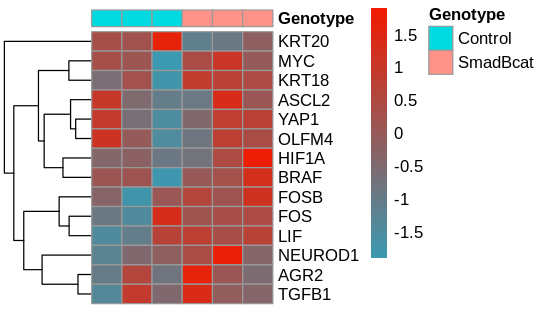

In [131]:
options(repr.plot.width=4.5, repr.plot.height=2.6)

library(wesanderson)
genes = c("AGR2", "FOS", "YAP1", "ASCL2", "NEUROD1", "MYC", "FOSB", "TGFB1", "HIF1A", "KRT18", "BRAF", "LIF", "OLFM4", "KRT20")


col = wes_palette("Zissou1")[c(1, 5)]

colnames(at) = paste(colnames(at), 1:ncol(at))
rownames(st) = colnames(at)
colnames(st) = "Genotype"
pheatmap(log2(at[genes, ]+1),font.size = 15, annotation_colors = col_ann, scale = "row", color = colorRampPalette(col)(1000), show_colnames = F,  cluster_cols = F, annotation_col = st)
